## Have sightings increase or decreased over time?

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Retrieve data from csv
time_data = pd.read_csv("output/clean_data.csv")
time_data.head()

,city,state,year,month,day,hour,minute,converted_timestamp,shape
0,Chester,VA,2019,12,12,18,43,2019-12-12 18:43:00,light
1,Rocky Hill,CT,2019,3,22,18,30,2019-03-22 18:30:00,circle
2,Peoria,NY,2009,3,15,18,0,2009-03-15 18:00:00,cigar
3,Kirbyville,TX,2019,4,2,20,25,2019-04-02 20:25:00,disk
4,Gold Canyon,AZ,2019,4,10,17,0,2019-04-10 17:00:00,circle


In [3]:
# Bin years into decades
bins = [0,1979,1989,1999,2009,2020]
group_names = ['1969-1979','1980-1989','1990-1999','2000-2009','2010-2019']
time_data['decades'] = pd.cut(time_data['year'],
                             bins, labels=group_names,
                             include_lowest = True)
time_data.head()

,city,state,year,month,day,hour,minute,converted_timestamp,shape,decades
0,Chester,VA,2019,12,12,18,43,2019-12-12 18:43:00,light,2010-2019
1,Rocky Hill,CT,2019,3,22,18,30,2019-03-22 18:30:00,circle,2010-2019
2,Peoria,NY,2009,3,15,18,0,2009-03-15 18:00:00,cigar,2000-2009
3,Kirbyville,TX,2019,4,2,20,25,2019-04-02 20:25:00,disk,2010-2019
4,Gold Canyon,AZ,2019,4,10,17,0,2019-04-10 17:00:00,circle,2010-2019


In [4]:
# Importing census data
populations = pd.read_csv("resources/census_data_19702020.csv")

In [5]:
# Get sightings per year
year_data = pd.DataFrame(time_data["year"].value_counts()).reset_index()
year_data = year_data.rename(columns={"year":"count", "index":"year"}).sort_values("year").reset_index(drop=True)

In [6]:
# Get total pop from census data for each 10 year period
year_data["population"] = 0

for year in year_data["year"]:
    if year <= 1979:
        year_data.loc[year_data["year"] == year, "population"] = populations.iloc[50]["population_1970"]
    elif year <= 1989:
        year_data.loc[year_data["year"] == year, "population"] = populations.iloc[50]["population_1980"]
    elif year <= 1999:
        year_data.loc[year_data["year"] == year, "population"] = populations.iloc[50]["population_1990"]
    elif year <= 2010:
        year_data.loc[year_data["year"] == year, "population"] = populations.iloc[50]["population_2010"]
    elif year <= 2019:
        year_data.loc[year_data["year"] == year, "population"] = populations.iloc[50]["population_2020"]
display(year_data.head())

,year,count,population
0,1969,73,203211926
1,1970,68,203211926
2,1971,59,203211926
3,1972,69,203211926
4,1973,110,203211926


In [7]:
# Find sighting count per million people
year_data["count_per_million"] = (year_data["count"]/year_data["population"])*1000000
averaged_data = year_data[["year", "count_per_million"]]
display(averaged_data.head())

,year,count_per_million
0,1969,0.359231
1,1970,0.334626
2,1971,0.290337
3,1972,0.339547
4,1973,0.541307


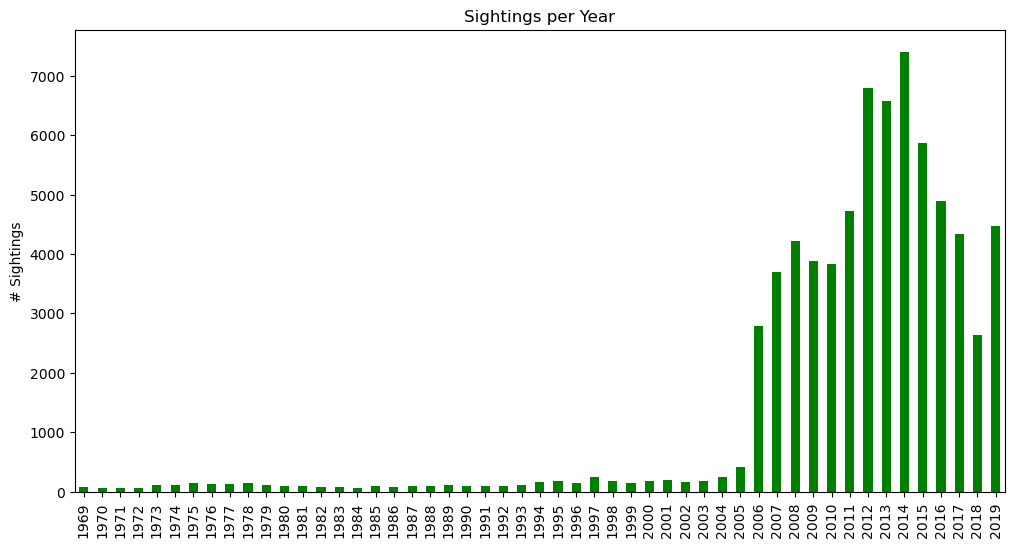

In [8]:
# Count sightings per year and plot
time_data['year'].value_counts().sort_index().plot(kind='bar', color='green',
                                                   ylabel='# Sightings',
                                                   title='Sightings per Year',
                                                   figsize=(12,6))
plt.savefig("visuals/sightings_per_year_bar.png")

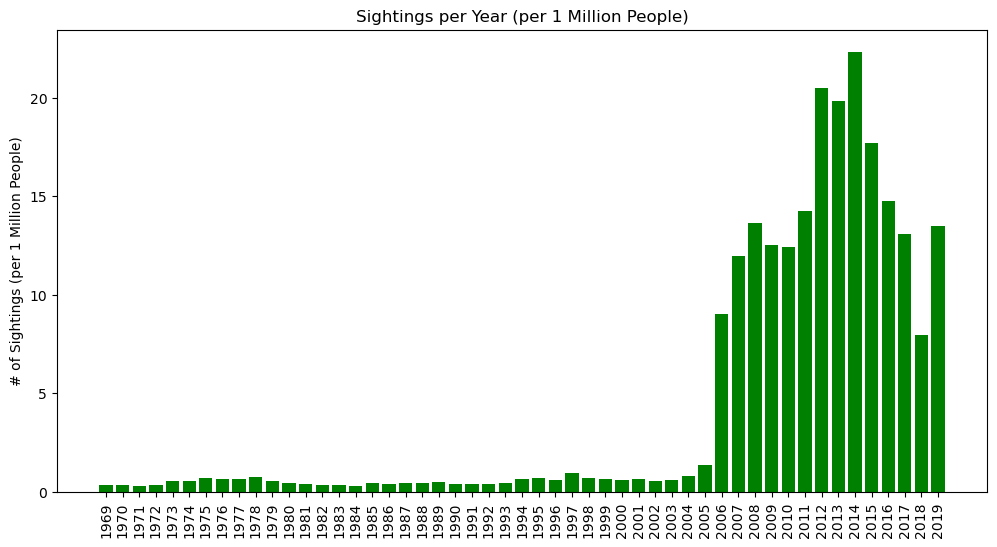

In [9]:
# Population Factored into Sightings per Year
plt.figure(figsize=(12,6))
plt.bar(averaged_data["year"], averaged_data["count_per_million"], color = "green")
plt.ylabel("# of Sightings (per 1 Million People)")
plt.title("Sightings per Year (per 1 Million People)")
plt.xticks(averaged_data["year"], rotation=90)
plt.savefig("visuals/sightings_per_mil_year_bar.png")
plt.show()

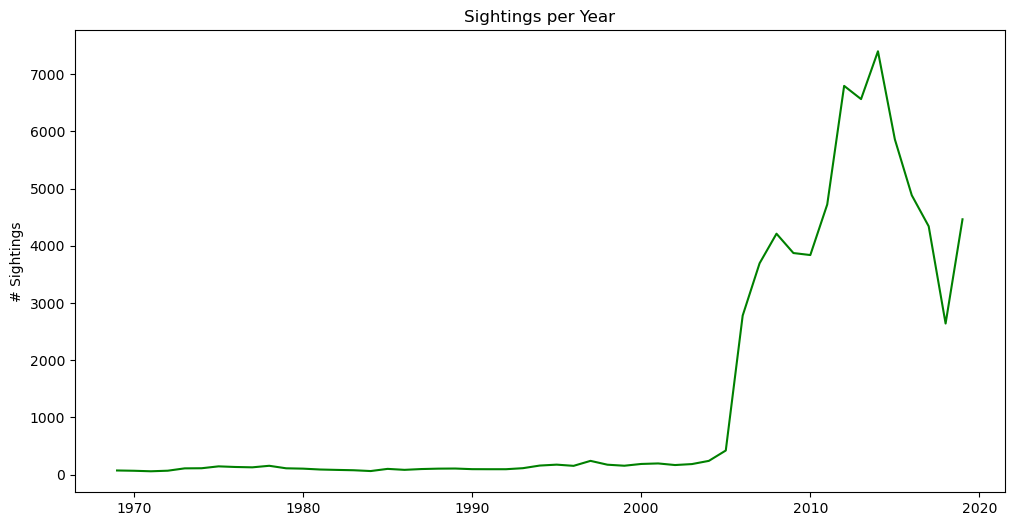

In [10]:
# Count sightings per year and plot
time_data['year'].value_counts().sort_index().plot(kind='line', color='green',
                                                   ylabel='# Sightings',
                                                   title='Sightings per Year',
                                                   figsize=(12,6))
plt.savefig("visuals/sightings_per_year_line.png")

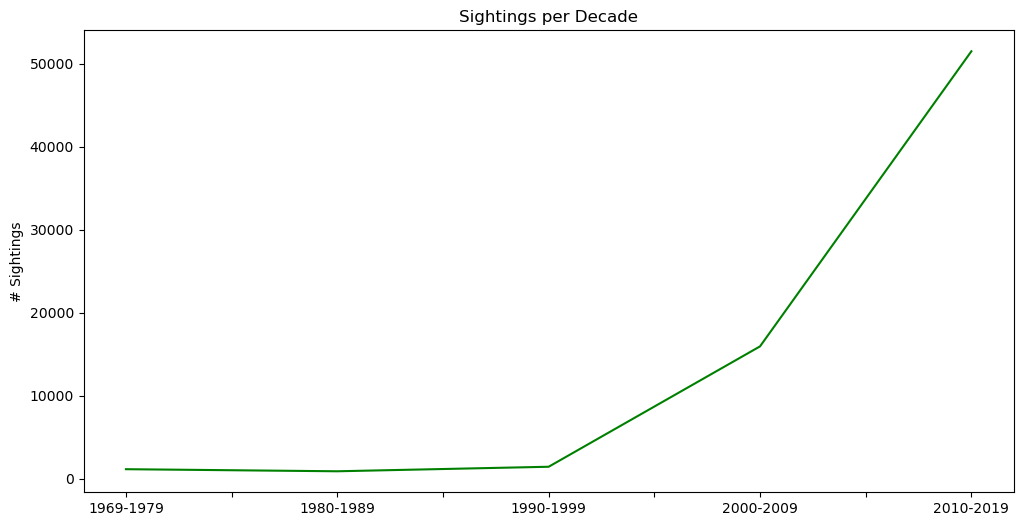

In [11]:
# Count sightings per decade and plot
time_data['decades'].value_counts().sort_index().plot(kind='line', color='green',
                                                   ylabel='# Sightings',
                                                   title='Sightings per Decade',
                                                   figsize=(12,6))
plt.savefig("visuals/sightings_per_decade_line.png")

In [12]:
# Get the year and number of sightings per year in their own dataframe
year_change=year_data[["year", "count"]]
year_change.head()

,year,count
0,1969,73
1,1970,68
2,1971,59
3,1972,69
4,1973,110


In [13]:
# Calculate the percent change from year to year for each year in the year_change dataframe
# Compile those numbers into a list
pct_changed = []

for year in year_change.index:
    newcount = year_change.iloc[year, 1]
    oldcount = year_change.iloc[(year-1), 1]
    pct_changed.append(round(((newcount-oldcount)/oldcount)*100,2))
pct_changed[0] = 0

In [14]:
# Add the pct_change list from above as a new column, percent change, to the dataframe
year_change['percent change'] = pct_changed
year_change.head()

,year,count,percent change
0,1969,73,0.00
1,1970,68,-6.85
2,1971,59,-13.24
3,1972,69,16.95
4,1973,110,59.42


In [15]:
# Find the year with the biggest change
max_index = year_change[['percent change']].idxmax()
year_change['year'].iloc[max_index]

37    2006
Name: year, dtype: int64

In [16]:
# Set index to year
year_change.set_index('year')
year_change.head()

,year,count,percent change
0,1969,73,0.00
1,1970,68,-6.85
2,1971,59,-13.24
3,1972,69,16.95
4,1973,110,59.42


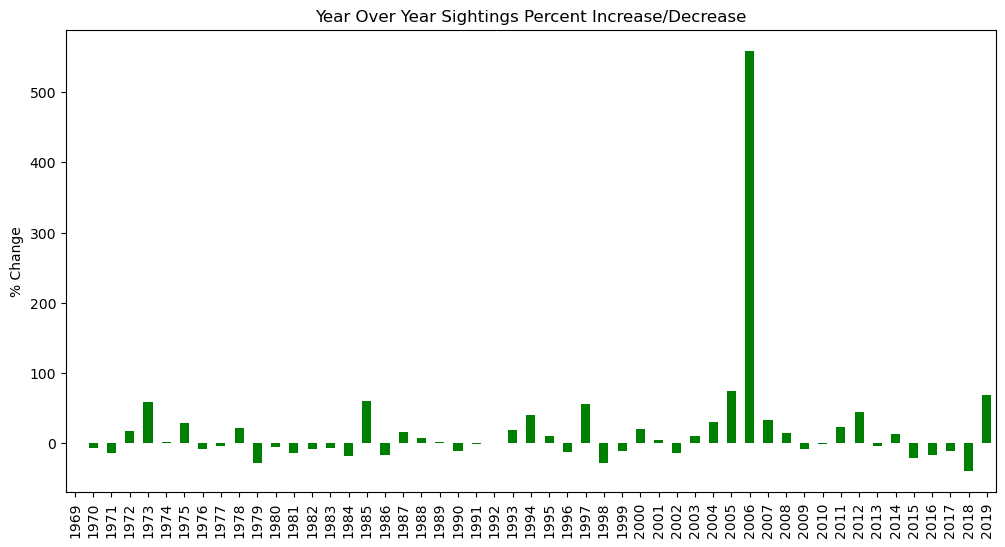

In [17]:
# Create a bar chart of percent change from year to year
ax = year_change['percent change'].plot(kind='bar', color='green',
                                                   ylabel='% Change',
                                                   title='Year Over Year Sightings Percent Increase/Decrease',
                                                   figsize=(12,6))
ax.set_xticklabels(year_change['year'])
plt.savefig("visuals/sightings_pctchange_bar.png")